# Descriptive Statistics with Pandas

## Lesson Goals
In this lesson, you will learn the basics of descriptive statistics with Pandas, including:

- Inspecting the data type of each column
- Obtaining the different descriptive statistics in Pandas
- Creating meaningful visualizations that describe the distribution of our dataset

## Introduction

In the prework, we have learned the basics of descriptive statistics using Google Sheets.<br>
In this lesson, we will learn the topic in depth using **Pandas**.

When analyzing data, we sometimes have to analyze large datasets with millions of rows. <br>
It is hard to make sense of the data without summarizing it. <br>
Descriptive statistics is a great tool to have in our tool belt to help us discover some inference about our data.

In this example, we will use a dataset **`animals.csv`** describing different animals and their **body weight** and **brain weight**.<br> 
We start by loading the dataset as a pandas DataFrame.

In [1]:
import pandas as pd
import numpy as np

In [2]:
animals = pd.read_csv('./data/animals.csv')
animals

,brainwt,bodywt,animal
0,3.385,44.500,Arctic_fox
1,0.480,15.499,Owl_monkey
2,1.350,8.100,Beaver
3,464.983,423.012,Cow
4,36.328,119.498,Gray_wolf
...,...,...,...
57,160.004,169.000,Brazilian_tapir
58,0.900,2.600,Tenrec
59,1.620,11.400,Phalanger
60,0.104,2.500,Tree_shrew


## Data Types

In order to get a basic understanding of our dataset, we can explore the data type in each column.

In [3]:
animals.dtypes

brainwt    float64
bodywt     float64
animal      object
dtype: object

In this case, we have two <u>**float**</u> columns and <u>**categorical**</u> column (Pandas denotes this as object).

Other possible types are integer and Boolean.

## Summarizing the Data

In order to look at multiple descriptive statistics at once, we can use the **describe function**. <br>
This function will show us the count, mean, standard deviation, minimum, 25th percentile, median (50th percentile), 75th percentile, and the maximum. <br>
We will **only get this summary for the numeric (integer or float)** columns.

In [4]:
animals.describe()

,brainwt,bodywt
count,62.000000,62.000000
mean,198.794290,283.135355
std,899.182313,930.278876
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.201250,165.998250
max,6654.180000,5711.860000


We can also look at each statistic separately but still for all columns.

In [5]:
animals.count()

brainwt    62
bodywt     62
animal     62
dtype: int64

In [6]:
animals.mean()

brainwt    198.794290
bodywt     283.135355
dtype: float64

In [7]:
animals.std()

brainwt    899.182313
bodywt     930.278876
dtype: float64

In [8]:
animals.max()

brainwt                  6654.18
bodywt                   5711.86
animal     Yellow-bellied_marmot
dtype: object

In [9]:
animals.min()

brainwt               0.005
bodywt                 0.14
animal     African_elephant
dtype: object

In [10]:
animals.median()

brainwt     3.3425
bodywt     17.2500
dtype: float64

In [11]:
animals.quantile(q=0.25)

brainwt    0.60
bodywt     4.25
Name: 0.25, dtype: float64

In [12]:
animals.quantile(q=0.75)

brainwt     48.20125
bodywt     165.99825
Name: 0.75, dtype: float64

In [13]:
animals.quantile(q=0.5)

brainwt     3.3425
bodywt     17.2500
Name: 0.5, dtype: float64

We can look at the summary statistics for each column separately. We do this by subsetting the column. For example:

In [14]:
animals['bodywt'].mean()

283.1353548387098

What does this summary tell us about the data?

The two main measures of **`central tendency`** are the **mean** and the **median** (50th percentile):<br>
- If they are close in value, it means that the data is symmetrically distributed around the mean. <br>
- If the mean is greater than the median, our data is right skewed. <br>
- If the median is greater than the mean, the data is left skewed. <br>

In our case, both columns have a very large mean compared to the median. <br>
This means that there are a few outliers that influence the mean and cause the data to be skewed.

In [15]:
animals.describe().loc[['mean', '50%']]

,brainwt,bodywt
mean,198.79429,283.135355
50%,3.34250,17.250000


## sns.distplot()

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

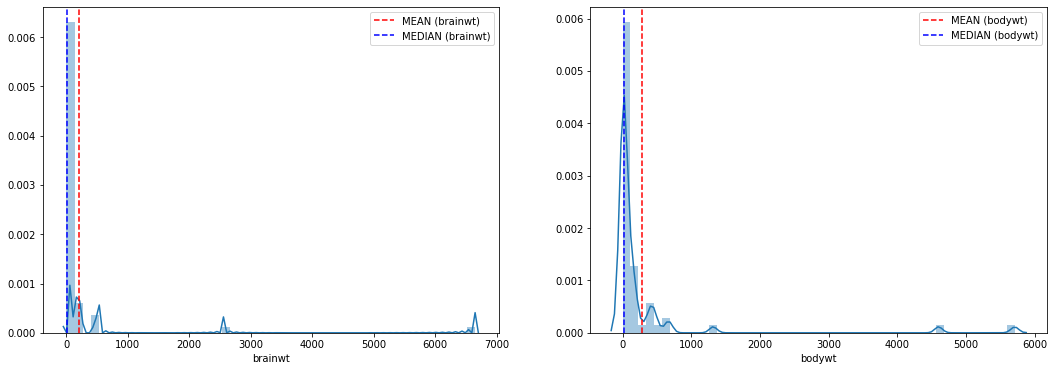

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

sns.distplot(animals['brainwt'], ax=ax[0])
ax[0].axvline(animals['brainwt'].mean(), color='r', linestyle='--', label='MEAN (brainwt)')
ax[0].axvline(animals['brainwt'].median(), color='b', linestyle='--', label = 'MEDIAN (brainwt)')
ax[0].legend()

sns.distplot(animals['bodywt'], ax=ax[1])
ax[1].axvline(animals['bodywt'].mean(), color='r', linestyle='--', label='MEAN (bodywt)')
ax[1].axvline(animals['bodywt'].median(), color='b', linestyle='--', label='MEDIAN (bodywt)')
ax[1].legend()

plt.show()

## Box Plot

Box plots are a visualization of a distribution of a dataset based on a 5-number summary: 
- minimum
- 25th percentile
- mean
- median
- 75th percentile
- maximum

The data between the 25th and 75th percentiles is drawn inside the box. <br>
We draw a boundary outside of the box called the **whiskers**. <br>
Box plots also indicate how extreme outliers are by plotting them as individual points.

This plot gives us a visual summary of the data and shows us whether the data is symmetric or skewed.

We can use the matplotlib library to plot visualizations using Pandas.<br>

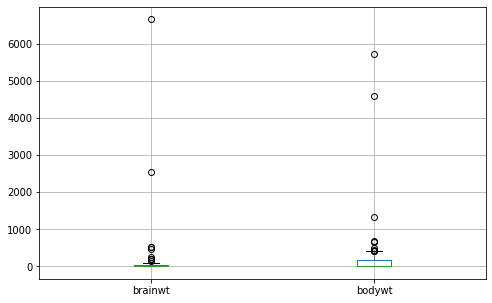

In [18]:
# Make a box plot from DataFrame columns

animals.boxplot(figsize=(8,5));

Our box plot confirms our initial suspicion that the data is skewed. <br>
We have small boxes for both brain weight and body weight and lots of outliers outside of the whiskers.

## Histogram

**`Histograms`** are a great way to look at the **frequency distribution** of our dataset. <br>

In our initial descriptive statistics lesson, we chose the bin size for our histogram and generated the bins ourselves. <br>
The **default bin size** in Pandas is **10**. <br>

We can also manually determine the bin size by passing the number of bins to the function.

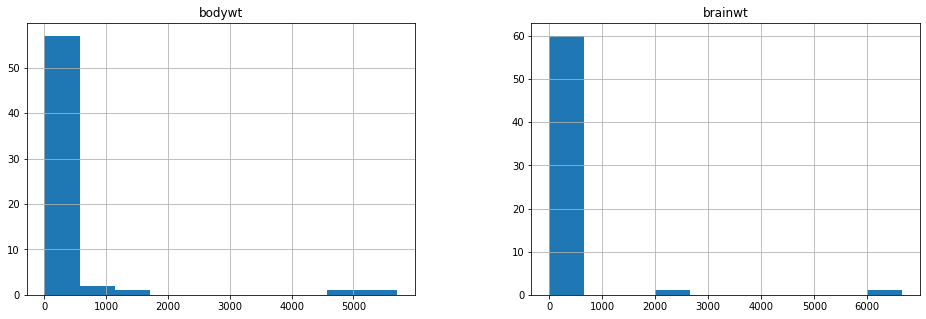

In [19]:
animals.hist(figsize=(16,5));

Here is an example of a histogram with 20 bins:

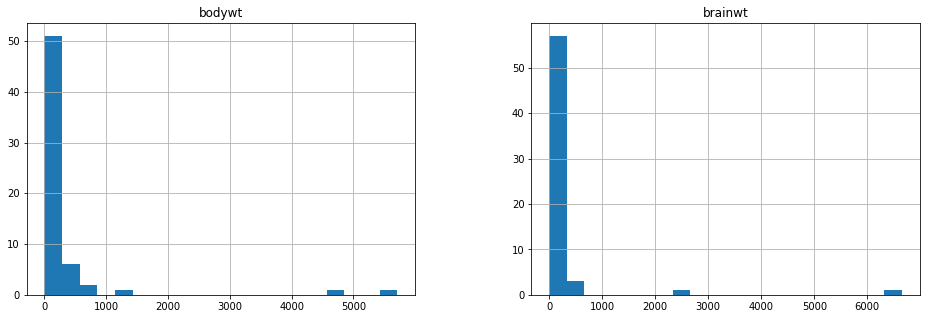

In [20]:
animals.hist(figsize=(16,5), bins=20);

These two histograms tell us that the bulk of the data is on the left end of the scale and we have a number of large outliers.

## Summary

In this lesson we learned to produce a large number of statistics that describe our dataset. <br>
We learned how these statistics are used to evaluate the data and we plotted a couple of meaningful visualizations that describe the data as well.